# Customer Segmentation for Marketing Strategies

## Objective
Use clustering to segment customers based on purchasing behavior, demographics, and engagement with services.

## Data
- Customer transaction data
- Demographic information
- Web activimport SimpleImputer


## Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Load the Data

In [4]:
# Load the datasets
customer_demographics = pd.read_csv('customer_demographics.csv')
customer_transactions = pd.read_csv('customer_transactions.csv', encoding='ISO-8859-1')
web_activity_logs = pd.read_csv('web_activity_logs.csv', encoding='ISO-8859-1')

In [6]:
# Display the first few rows of each dataset
print("Customer Demographics:")
print(customer_demographics.head())

print("\nCustomer Transactions:")
print(customer_transactions.head())

print("\nWeb Activity Logs:")
print(web_activity_logs.head())

Customer Demographics:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Customer Transactions:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17

## Exploratory Data Analysis (EDA)
### 1. Preprocessing the customer demographics data
#### Select relevant features for clustering

In [14]:
demographics_features = customer_demographics[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [18]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(demographics_features)

## 2. Determine the optimal number of clusters using the Elbow Method

In [21]:
inertia = []
cluster_range = range(1, 11)

In [23]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

D:\Apps\APP_DATA\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Apps\APP_DATA\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Apps\APP_DATA\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Apps\APP_DATA\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

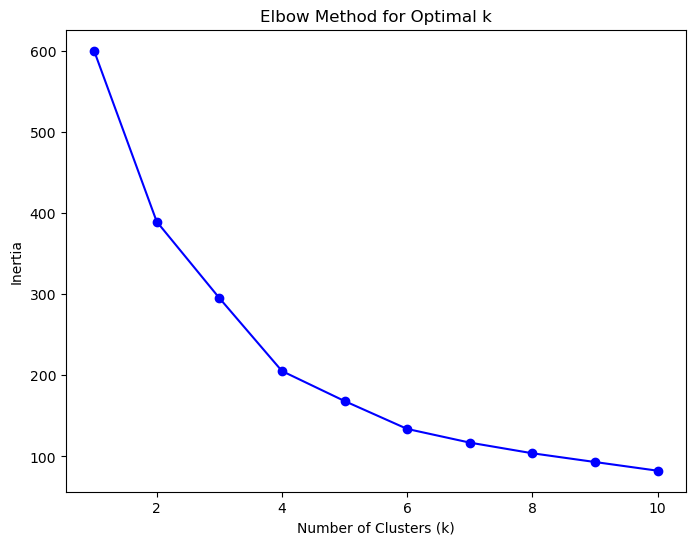

In [25]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

## 3. Apply K-Means Clustering

In [28]:
optimal_k = 5  # Assuming the elbow plot suggests 5 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

D:\Apps\APP_DATA\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Apps\APP_DATA\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
# Add cluster labels to the original dataset
customer_demographics['Cluster'] = clusters

In [32]:
# Display the first few rows with cluster labels
print("\nCustomer Demographics with Clusters:")
print(customer_demographics.head())


Customer Demographics with Clusters:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        1  
1        1  
2        0  
3        1  
4        1  


In [ ]:
# 4. Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_demographics, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()